
> - NAME: 166895_Joseph_Ogada 
> - COURSE: DSA 8202 Time Series Analysis and Forecasting
> - LECTURER: Professor Yong Yoon
> - TASK: Personal Project: Financial Trading Strategy
> - TITLE: Delving into Netflix's Stock Trajectory 

<hr>
<h1>Building a trading strategy</h1>
<p>A trading strategy in time series analysis involves using historical data of asset prices, such as stocks, currencies, or commodities, to make buy or sell decisions with the goal of generating profits. Time series data represents observations collected at regular time intervals, typically in chronological order.
This particular strategy focuses on Netflix Stock data
</p>
<hr>

## Library Importations

In [800]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import talib
import bt
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")


<hr>
<h1>Data Exploration</h1>
<hr>

## Data Fetch

In [735]:
netflix_df = pd.DataFrame(yf.download('NFLX', start = '2012-6-1', end = '2024-02-14'))

[*********************100%%**********************]  1 of 1 completed


#### Checking for Null Values

In [736]:
print(netflix_df.isna().sum() * 100 / len(netflix_df))

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


# Visualization of Historical Netflix Stock Prices
Will enable identification of: 
> - Price trends overtime
> - Support and Resistance Levels
> - Potential Entry and Exit points

### Understanding the data
- plotting line & candlestick charts


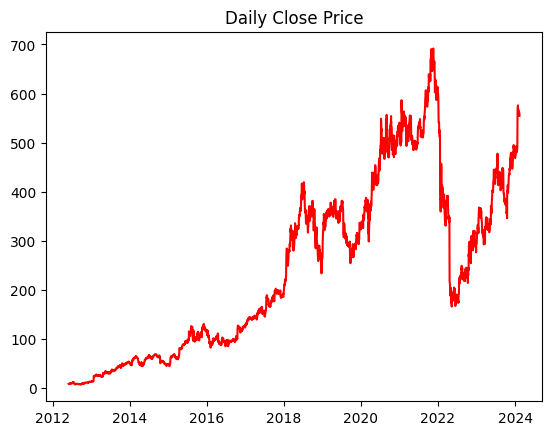

In [737]:
plt.plot(netflix_df['Close'], color='red')
plt.title("Daily Close Price")
plt.show()

In [738]:
# candlestick
candlestick =go.Candlestick(
    x = netflix_df.index,
    open = netflix_df['Open'],
    high= netflix_df['High'],
    low= netflix_df['Low'],
    close= netflix_df['Close'],
)
# plot
fig = go.Figure(data = [candlestick])
fig.show()

### Resample Data
> - Based on Long-term trader 

In [739]:
netflix_df_weekly = netflix_df.resample('W').mean()
netflix_df_weekly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-03,8.707143,9.104286,8.671429,8.992857,8.992857,35578200.0
2012-06-10,9.282571,9.513143,9.140286,9.314000,9.314000,26615820.0
2012-06-17,9.094571,9.270572,8.891714,9.065714,9.065714,24164700.0
2012-06-24,9.598286,9.819714,9.440000,9.669143,9.669143,22621620.0
2012-07-01,9.612857,9.751714,9.455715,9.604857,9.604857,19364520.0


### Daily Returns Calculations

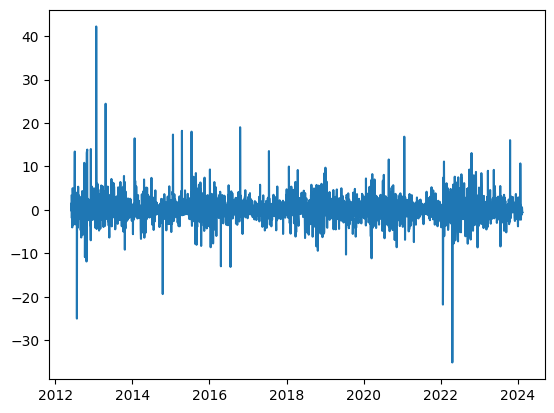

In [740]:
netflix_df['daily_return'] = netflix_df['Close'].pct_change()*100
# plot
plt.plot(netflix_df['daily_return'])
plt.show()

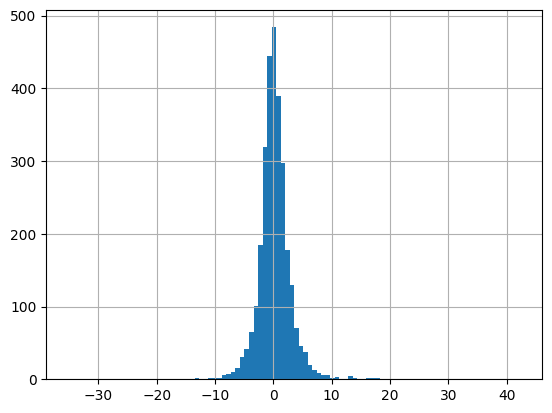

In [741]:
netflix_df['daily_return'].hist(bins=100)
plt.show()

## Technical Indicators (Data Transformation)
> - Simple Moving Average(SMA): arithmetic mean price over a specified n-period 
> - Trend Indicators(direction and strength of a trend -Moving Average) <<<=== Target as we will be using a trend-following strategy
> - Momentum Indicators(measures the velocity of price movement - Relative Strength Index)
> - Volatility Indicators(measures the magnitude of price deviations - Bollinger Bands)

<hr>
<h1>Technical Analysis</h1>
<hr>

## Trend Indicators
> - Moving Average (SMA: Simple Moving average & EMA: Exponential Moving Average)
> - Average Directional Movement Index

### Trend-following Strategy
<hr>

In [742]:
# Simple Moving Average(SMA)
netflix_df['SMA_short'] = talib.SMA(netflix_df['Close'], timeperiod=50)
netflix_df['SMA_long'] = talib.SMA(netflix_df['Close'], timeperiod=200) 
netflix_df.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_return,SMA_short,SMA_long
Date,,,,,,,,,
2024-02-07,558.159973,567.799988,554.979980,559.299988,559.299988,4373600,0.615238,496.100199,428.729599
2024-02-08,560.549988,563.700012,555.739990,558.530029,558.530029,3175500,-0.137665,497.687399,429.877150
2024-02-09,565.000000,566.000000,558.099976,561.320007,561.320007,3055700,0.499522,499.333799,431.071000
2024-02-12,560.359985,568.440002,557.000000,557.849976,557.849976,3608500,-0.618191,500.946999,432.254500
2024-02-13,550.799988,559.200012,549.000000,554.520020,554.520020,3511500,-0.596927,502.557999,433.397850


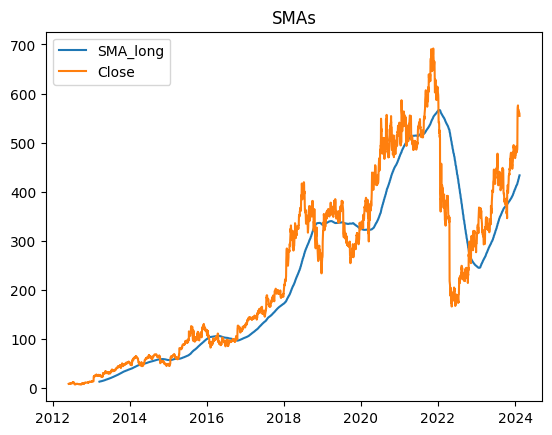

In [743]:
# Plot SMA with the price
plt.plot(netflix_df['SMA_long'],label='SMA_long') 
plt.plot(netflix_df['Close'],label='Close')
# Customize and show the plot
plt.legend()
plt.title('SMAs')
plt.show()

In [744]:
# Calculating the Indicators
netflix_df['EMA_short'] = talib.EMA(netflix_df['Close'], timeperiod=50)
netflix_df['EMA_long'] = talib.EMA(netflix_df['Close'], timeperiod=200)
netflix_df.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_return,SMA_short,SMA_long,EMA_short,EMA_long
Date,,,,,,,,,,,
2024-02-07,558.159973,567.799988,554.979980,559.299988,559.299988,4373600,0.615238,496.100199,428.729599,502.153845,433.756091
2024-02-08,560.549988,563.700012,555.739990,558.530029,558.530029,3175500,-0.137665,497.687399,429.877150,504.364676,434.997623
2024-02-09,565.000000,566.000000,558.099976,561.320007,561.320007,3055700,0.499522,499.333799,431.071000,506.598218,436.254562
2024-02-12,560.359985,568.440002,557.000000,557.849976,557.849976,3608500,-0.618191,500.946999,432.254500,508.608091,437.464466
2024-02-13,550.799988,559.200012,549.000000,554.520020,554.520020,3511500,-0.596927,502.557999,433.397850,510.408559,438.629198


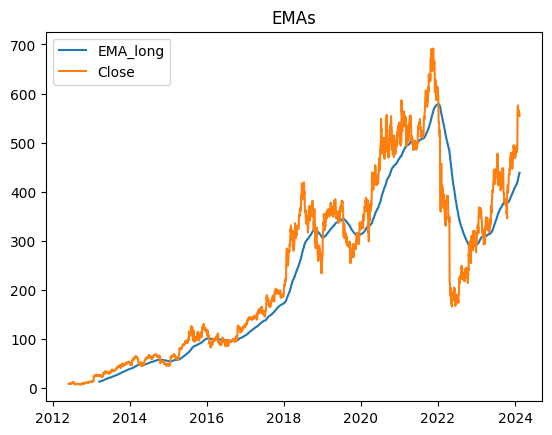

In [745]:
plt.plot(netflix_df['EMA_long'],label='EMA_long')
plt.plot(netflix_df['Close'],label='Close')
# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

## Strength indicator: Average Directional Movement Index(ADX)

In [746]:
# Calculate ADX
netflix_df['ADX'] = talib.ADX(netflix_df['High'], netflix_df['Low'], netflix_df['Close'],timeperiod=14)

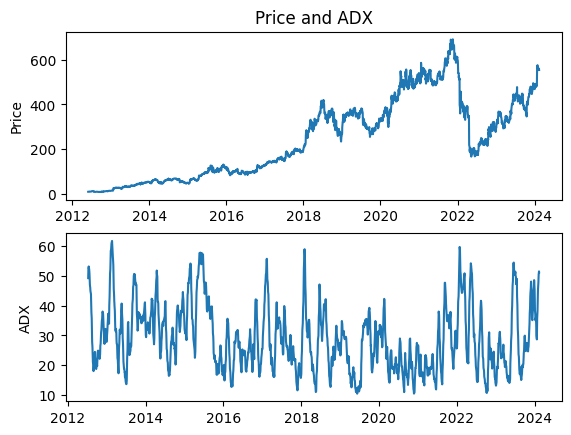

In [747]:
fig, (ax1, ax2) = plt.subplots(2)
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(netflix_df['Close'])
ax2.set_ylabel('ADX')
ax2.plot(netflix_df['ADX'])
ax1.set_title('Price and ADX')
plt.show()

## Volatility indicator: Bollinger Bands

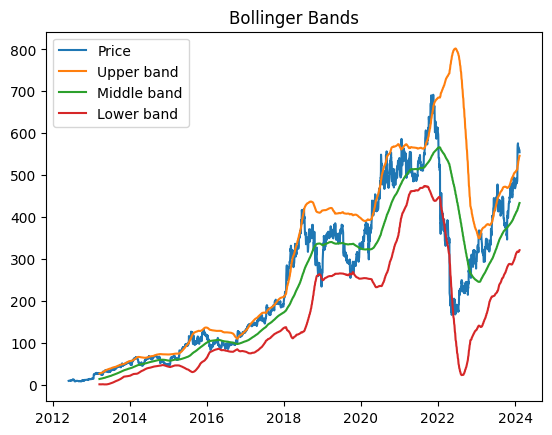

In [748]:
# Define the Bollinger Bands
upper, mid, lower = talib.BBANDS(netflix_df['Close'],nbdevup=2,nbdevdn=2,timeperiod=200)
# Plot the Bollinger Bands
plt.plot(netflix_df['Close'], label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()

The prices are less volatile.

## Trading Signals

In [749]:
# Create the signal DataFrame
signal = netflix_df['EMA_long'].copy()
signal[netflix_df['EMA_long'].isnull()] = 0

# Construct the signal
signal[netflix_df['EMA_short'] > netflix_df['EMA_long']] = 1
signal[netflix_df['EMA_short'] < netflix_df['EMA_long']] = -1

### Plotting the signal
**Two EMA crossover:**
> - Long signal: the short-term EMA crosses above the long-term EMA
> - Short signal: the short-term EMA crosses below the long-term EMA

<Axes: xlabel='Date'>

<Figure size 1200x600 with 0 Axes>

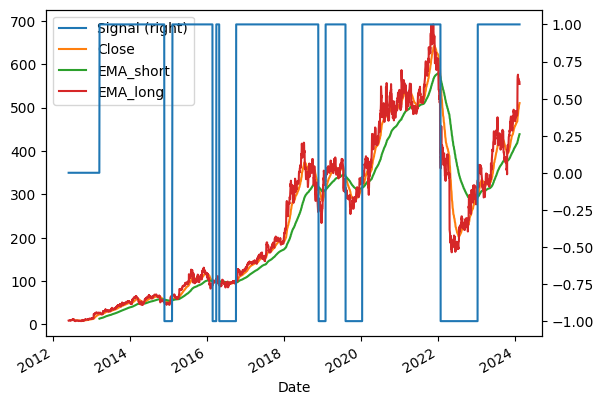

In [750]:
# Plot the signal, price and MAs
combined_df = bt.merge(signal, netflix_df['EMA_short'], netflix_df['EMA_long'],netflix_df['Close'])
combined_df.columns = ['Signal', 'Close','EMA_short','EMA_long']
plt.figure(figsize=(12, 6))
combined_df.plot(secondary_y=['Signal'])

In [751]:
# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover',
                          [bt.algos.WeighTarget(pd.DataFrame(signal)),
                           bt.algos.Rebalance()])

### Backtest the signal based strategy

In [752]:
print(netflix_df.isna().sum() * 100 / len(netflix_df))

Open            0.000000
High            0.000000
Low             0.000000
Close           0.000000
Adj Close       0.000000
Volume          0.000000
daily_return    0.033967
SMA_short       1.664402
SMA_long        6.759511
EMA_short       1.664402
EMA_long        6.759511
ADX             0.917120
dtype: float64


In [753]:
netflix_df=netflix_df.dropna()

In [754]:
print(netflix_df.isna().sum() * 100 / len(netflix_df))

Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
daily_return    0.0
SMA_short       0.0
SMA_long        0.0
EMA_short       0.0
EMA_long        0.0
ADX             0.0
dtype: float64


<Axes: title={'center': 'Backtest result'}>

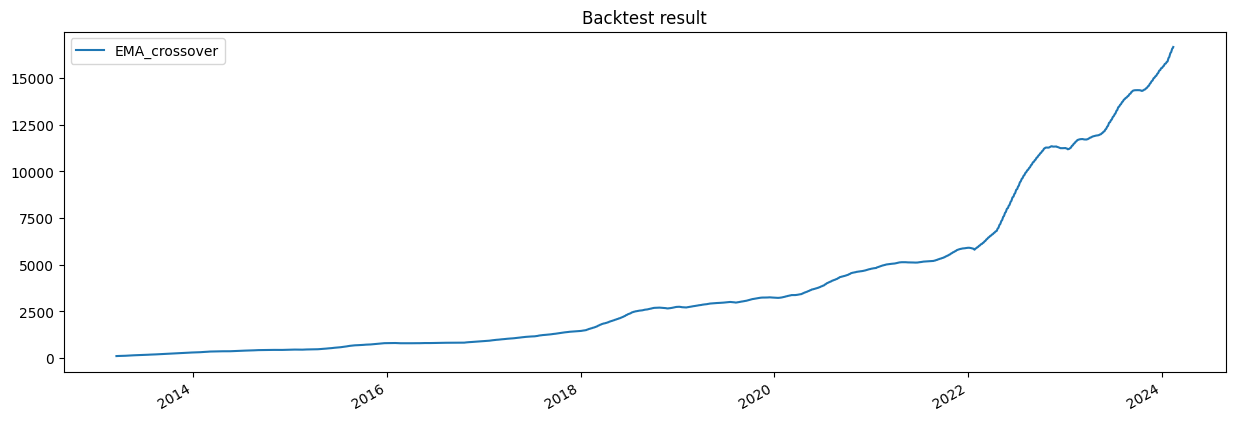

In [755]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, netflix_df) 
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')

The above indicates positive performance based on the strategy and historical data. Hence, suggests that strategy generated profits over the historical period tested.

## Mean Reversion Strategy
<hr>

In [756]:
# Calculate the RSI
stock_rsi = talib.RSI(netflix_df['Close']).to_frame()

In [757]:
# Constructing the Signal
signal2 = stock_rsi.copy()
signal2[stock_rsi.isnull()] = 0
# Construct the signal
signal2[stock_rsi < 30] = 1
signal2[stock_rsi > 70] = -1
print(signal2)

                    0
Date                 
2013-03-20   0.000000
2013-03-21   0.000000
2013-03-22   0.000000
2013-03-25   0.000000
2013-03-26   0.000000
...               ...
2024-02-07  68.031472
2024-02-08  67.469857
2024-02-09  68.485084
2024-02-12  65.737156
2024-02-13  63.119789

[2745 rows x 1 columns]


In [758]:
signal2

,0
Date,
2013-03-20,0.000000
2013-03-21,0.000000
2013-03-22,0.000000
2013-03-25,0.000000
2013-03-26,0.000000
...,...
2024-02-07,68.031472
2024-02-08,67.469857
2024-02-09,68.485084


In [759]:
stock_rsi=stock_rsi.dropna()

Text(0.5, 1.0, 'RSI')

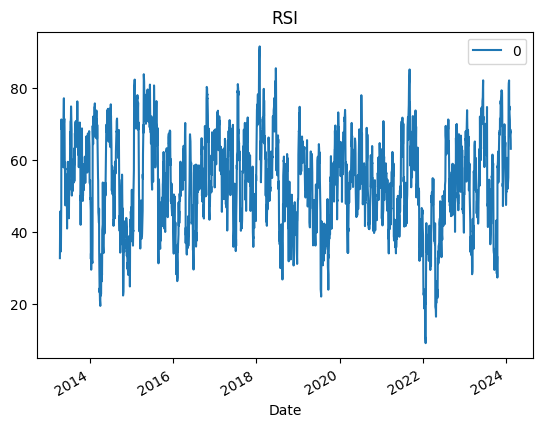

In [760]:
# Plot the RSI
stock_rsi.plot()
plt.title('RSI')


<Axes: xlabel='Date'>

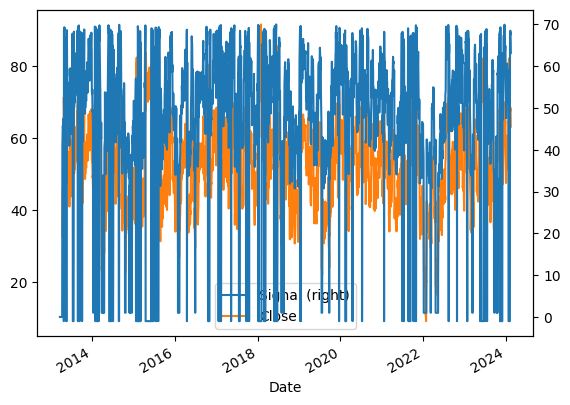

In [761]:
# Merge data into one DataFrame
combined_df = bt.merge(signal2,stock_rsi)
combined_df.columns = ['Signal', 'Close']# Plot the signal with price
combined_df.plot(secondary_y = ['Signal']) 

In [762]:
# Define the strategy
bt_strategy2 = bt.Strategy('RSI_MeanReversion',[bt.algos.WeighTarget(pd.DataFrame(signal2)),bt.algos.Rebalance()])

In [763]:
signal2

,0
Date,
2013-03-20,0.000000
2013-03-21,0.000000
2013-03-22,0.000000
2013-03-25,0.000000
2013-03-26,0.000000
...,...
2024-02-07,68.031472
2024-02-08,67.469857
2024-02-09,68.485084


In [764]:
netflix_df['Close']

Date
2013-03-20     26.150000
2013-03-21     25.998571
2013-03-22     25.900000
2013-03-25     25.827143
2013-03-26     27.230000
                 ...    
2024-02-07    559.299988
2024-02-08    558.530029
2024-02-09    561.320007
2024-02-12    557.849976
2024-02-13    554.520020
Name: Close, Length: 2745, dtype: float64

## Strategy Optimization and Benchmarking

In [791]:
# Calculating the Indicators
netflix_df['EMA_20'] = talib.EMA(netflix_df['Close'], timeperiod=20)
# netflix_df['EMA_20'] = netflix_df['EMA_20'].fillna(0,inplace=True)
print(netflix_df['EMA_20'].isna().any())
netflix_df['EMA_20'] = netflix_df['EMA_20'].fillna(0) 
netflix_df['EMA_50'] = talib.EMA(netflix_df['Close'], timeperiod=50)
netflix_df['EMA_50'] = netflix_df['EMA_50'].fillna(0) 
netflix_df['EMA_100'] = talib.EMA(netflix_df['Close'], timeperiod=100)
netflix_df['EMA_100'] = netflix_df['EMA_100'].fillna(0)   


True


In [807]:
# benchmark
netflix_df['benchmark_returns']= netflix_df['Close'].pct_change()
netflix_df['benchmark_returns'].fillna(0)

Date
2013-03-20    0.000000
2013-03-21   -0.005791
2013-03-22   -0.003791
2013-03-25   -0.002813
2013-03-26    0.054317
                ...   
2024-02-07    0.006152
2024-02-08   -0.001377
2024-02-09    0.004995
2024-02-12   -0.006182
2024-02-13   -0.005969
Name: benchmark_returns, Length: 2745, dtype: float64

In [808]:
# Backtesting
netflix_df['strategy_returns'] = netflix_df['benchmark_returns'].shift(-1)

In [809]:
# Evaluate strategy performance
mse = mean_squared_error(netflix_df['benchmark_returns'].dropna(), netflix_df['strategy_returns'].dropna())
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


<Axes: title={'center': 'Strategy optimization'}, xlabel='Date'>

<Figure size 1200x600 with 0 Axes>

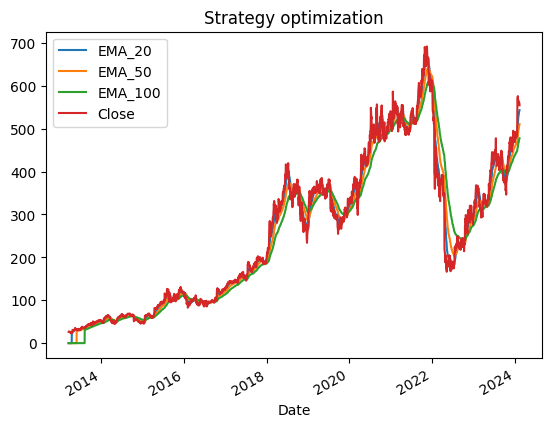

In [793]:

# Plot the signal, price and MAs
combined_df = bt.merge( netflix_df['EMA_20'], netflix_df['EMA_50'], netflix_df['EMA_100'],netflix_df['Close'])
combined_df.columns = ['EMA_20','EMA_50','EMA_100', 'Close' ]
plt.figure(figsize=(12, 6))
combined_df.plot(title='Strategy optimization')


## Strategy return analysis

In [ ]:
# Get all backtest stats
resInfo = bt_result.stats
print(resInfo.index)

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')


In [ ]:
# Get the lookback returns
lookback_returns = bt_result.display_lookback_returns()
print(lookback_returns)

      EMA_crossover
mtd           2.68%
3m           14.25%
6m           20.39%
ytd           7.36%
1y           43.56%
3y           49.97%
5y           43.62%
10y          48.41%
incep        59.87%


In [ ]:
print('Daily return: %.4f'% resInfo.loc['daily_mean'])
print('Monthly return: %.4f'% resInfo.loc['monthly_mean'])
print('Yearly return: %.4f'% resInfo.loc['yearly_mean'])
print('Compund Annual Growth rate: %.4f'% resInfo.loc['cagr'])


Daily return: 0.4705
Monthly return: 0.4800
Yearly return: 0.4726
Compund Annual Growth rate: 0.5987


Text(0.5, 0.98, 'weekly Return Histogram Matrix')

<Figure size 640x480 with 0 Axes>

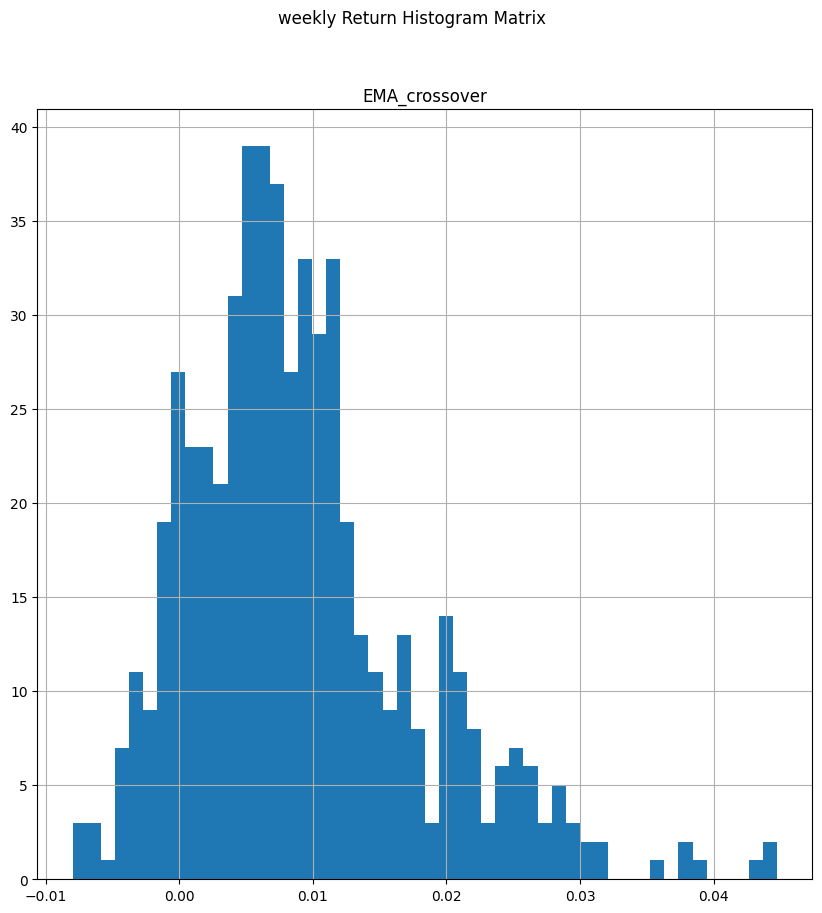

In [813]:
bt_result.plot_histograms(bins=50, freq='w')

## Drawdowns 

In [814]:
resInfo = bt_result.stats
# Get the max drawdown
max_drawdown = resInfo.loc['max_drawdown']
print('Maximum drawdown: %.2f'% max_drawdown)
# Get the average drawdown
avg_drawdown = resInfo.loc['avg_drawdown']
print('Average drawdown: %.2f'% avg_drawdown)
# Get the average drawdown days
avg_drawdown_days = resInfo.loc['avg_drawdown_days']
print('Average drawdown days: %.0f'% avg_drawdown_days)

Maximum drawdown: -0.02
Average drawdown: -0.01
Average drawdown days: 30


## Calmar Ratio

In [816]:
# Get the CAGR
cagr = resInfo.loc['cagr']
# Get the max drawdown
max_drawdown = resInfo.loc['max_drawdown']
# Calculate Calmar ratio mannually
calmar_calc = cagr / max_drawdown * (-1)
print('Calmar Ratio calculated: %.2f'% calmar_calc)
# Calmar Ratio
calmar = resInfo.loc['calmar']
print('Calmar Ratio: %.2f'% calmar)

Calmar Ratio calculated: 25.99
Calmar Ratio: 25.99


## Sharpe Ratio & Sortino from bt backtest

In [818]:
# Get Sharpe ratios from the backtest stats
print('Sharpe ratio daily: %.2f'% resInfo.loc['daily_sharpe'])
print('Sharpe ratio monthly %.2f'% resInfo.loc['monthly_sharpe'])
print('Sharpe ratio annually %.2f'% resInfo.loc['yearly_sharpe'])
# Get Sortino ratio from backtest stats
print('Sortino ratio daily: %.2f'% resInfo.loc['daily_sortino'])
print('Sortino ratio monthly %.2f'% resInfo.loc['monthly_sortino'])
print('Sortino ratio annually %.2f'% resInfo.loc['yearly_sortino'])

Sharpe ratio daily: 16.65
Sharpe ratio monthly 3.81
Sharpe ratio annually 1.55
Sortino ratio daily: 113.33
Sortino ratio monthly 58.47
Sortino ratio annually inf


## Forecasting Future values using ARIMA MODEL

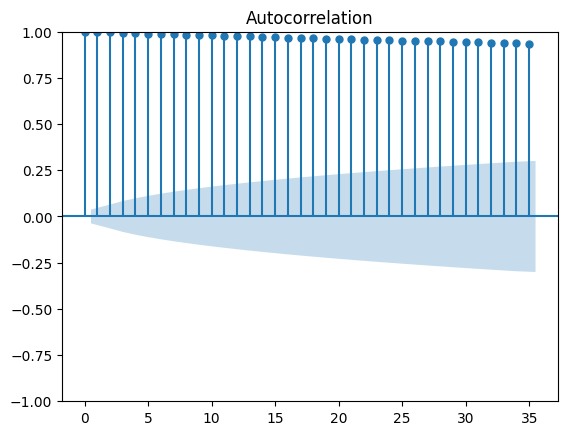

In [ ]:
# Calculate ACF and PACF
plot_acf(netflix_df['Close'])
plt.show()

In [ ]:
# Implement ARIMA model
model = ARIMA(netflix_df['Close'], order=(5,1,0))  # ARIMA(5,1,0)
model_fit = model.fit()

# ARIMA forecast for the next data point
forecast = model_fit.forecast(steps=1)  # Forecast for the next period

# Add the ARIMA forecast value to the 'ARIMA_Forecast' column in the data DataFrame
netflix_df['ARIMA_Forecast'] = forecast

# Print the results of ARIMA forecast
print("ARIMA Forecast:")
print(netflix_df['ARIMA_Forecast'].tail(1))

ARIMA Forecast:
Date
2024-02-13   NaN
Name: ARIMA_Forecast, dtype: float64


## Forecasting Future values using ARIMA MODEL

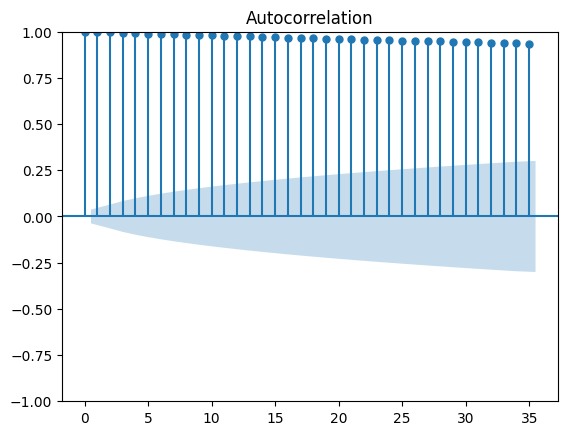

In [ ]:
# Calculate ACF and PACF
plot_acf(netflix_df['Close'])
plt.show()

In [ ]:
# Implement ARIMA model
model = ARIMA(netflix_df['Close'], order=(5,1,0))  # ARIMA(5,1,0)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2745
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9688.994
Date:                Tue, 20 Feb 2024   AIC                          19389.989
Time:                        19:30:36   BIC                          19425.492
Sample:                             0   HQIC                         19402.817
                               - 2745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0184      0.014     -1.332      0.183      -0.045       0.009
ar.L2          0.0196      0.013      1.476      0.140      -0.006       0.046
ar.L3          0.0108      0.016      0.684      0.4

<hr>
<h1>Summary:</h1>
<p>
The above indicates positive performance based on the strategy and historical data. Hence, suggests that the strategy generated profits over the historical period tested. 
The prices are as well less volatile
</p>

<hr>